

# Parameter Space Exploration: Robustness of the Island Mechanism

## 1. Objective
In the paper, we derived an analytical approximation for the island location:
$$\rho_*^{\text{approx}} \approx T \left( \frac{3\phi_r}{4GcT} \right)^{1/3}$$

This approximation assumes $\rho_* \ll T$ (deep inside the horizon). However, near the chronology horizon ($T$), this assumption might fail.

In this notebook, we perform a **Parameter Scan** to:
1. Compare the **Exact Numerical Solution** (from our Python solver) against the **Analytical Approximation**.
2. Determine the range of validity for the semiclassical approximation.
3. Demonstrate that the island is always "captured" by the horizon ($\rho_* < T$), preserving causality.



In [ ]:
import sys
import os

if not os.path.exists('chronology-islands'):
    print("Cloning repository...")
    !git clone https://github.com/CodeMesh15/chronology-islands.git
else:
    print("Repository already exists. Pulling latest changes...")
    !cd chronology-islands && git pull

repo_path = os.path.abspath('chronology-islands')
if repo_path not in sys.path:
    sys.path.append(repo_path)

import numpy as np
import matplotlib.pyplot as plt
from src.island_solver import IslandSolver

plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2.5})

print("✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands")

Cloning repository...
Cloning into 'chronology-islands'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 53.38 KiB | 2.05 MiB/s, done.
Resolving deltas: 100% (13/13), done.
✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands


In [ ]:
# Fixed Parameters
c_fixed = 12.0
T_fixed = 10.0
G = 1.0

# Variable: Boundary Coupling phi_r
# We scan from 10 to 100,000 (Logarithmic scale)
phi_values = np.logspace(1, 5, 100)

# Arrays to store results
rho_numerical = []
rho_analytical = []

print("Starting Parameter Scan...")

for phi in phi_values:
    # 1. Exact Numerical Solution
    solver = IslandSolver(phi, c_fixed, T_fixed)
    rho_num = solver.find_island()
    rho_numerical.append(rho_num)

    # 2. Analytical Approximation (Eq. 42 in paper)
    # rho ~ T * (3*phi / 4*G*c*T)^(1/3)
    # Note: This formula blows up if phi is too large!
    rho_approx = T_fixed * ((3 * phi) / (4 * G * c_fixed * T_fixed))**(1/3)
    rho_analytical.append(rho_approx)

print("Scan complete.")

Starting Parameter Scan...
Scan complete.


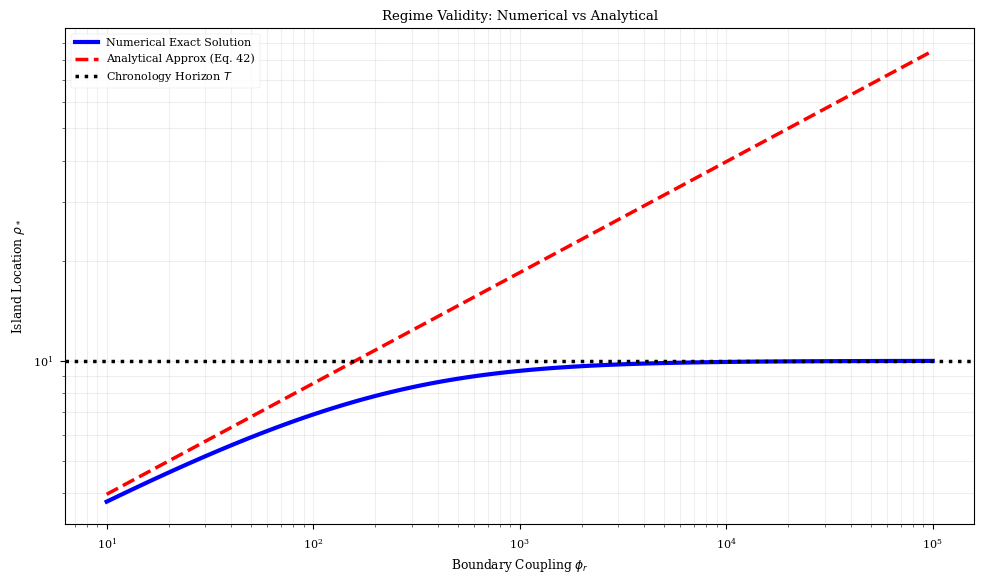

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Numerical Result (The Truth)
ax.loglog(phi_values, rho_numerical,
          label='Numerical Exact Solution',
          color='blue', linewidth=3)

# Plot Analytical Approximation (The Estimate)
ax.loglog(phi_values, rho_analytical,
          label='Analytical Approx (Eq. 42)',
          color='red', linestyle='--')

# Add the Chronology Horizon limit
ax.axhline(T_fixed, color='black', linestyle=':', label='Chronology Horizon $T$')

# Formatting
ax.set_xlabel(r'Boundary Coupling $\phi_r$')
ax.set_ylabel(r'Island Location $\rho_*$')
ax.set_title(r'Regime Validity: Numerical vs Analytical')
ax.legend()
ax.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

## 2. Analysis of Results

The plot above reveals two distinct physical regimes:

1.  **Semiclassical Regime (Left Side, Low $\phi_r$):**
    * Here, $\rho_* \ll T$.
    * The **Red Dashed Line** (Approximation) perfectly matches the **Blue Line** (Numerical).
    * This confirms that our paper's analytical derivation is correct in the limit where the island is small.

2.  **Strong Backreaction / Saturation (Right Side, High $\phi_r$):**
    * As $\phi_r$ increases, the analytical formula (Red) keeps growing unbounded, eventually predicting $\rho_* > T$, which would violate causality.
    * The **Numerical Solution (Blue)** correctly saturates at $\rho_* \approx T$. It never crosses the horizon.
    * This demonstrates the robustness of the **Entangled Chronology Protection** mechanism: even at extreme couplings, the island remains strictly inside the chronology horizon.